# [NTDS'18] Team project
[ntds'18]: https://github.com/mdeff/ntds_2018


## Students

* Team: `<34>`
* Students: `<Valentin Morel, Xavier Sieber, Cédric Schumacher, Charles-Théophile Coen>`
* Dataset: `<Terrorist attack>`

The purpose of this file is to import and create the basic elements that are used in our project. Matrices such as the features, adjacency or labels are computed in this file. This file should be run before any other manipulations. 

In [1]:
%matplotlib inline

import numpy as np
import networkx as nx
import pandas as pd
from scipy import sparse
import scipy.sparse.linalg
from matplotlib import pyplot as plt
from pyunlocbox import functions, solvers
from scipy.spatial.distance import pdist, squareform

In [2]:
# Features
features = pd.read_csv('TerrorAttack/terrorist_attack.nodes',delim_whitespace=' ',header = None,engine='python')
features = features.drop( columns=0)
features = features.drop(columns=107)
np.save('features_matrix', features)

In [3]:
# Labels
labels = pd.read_csv('TerrorAttack/terrorist_attack.nodes',delim_whitespace=' ',header = None,engine='python')[[107]]
labels[107] = labels[107].map(lambda x: x.lstrip('http://counterterror.mindswap.org2005/ict_events.owl#'))
#dico = {'Arson':1, 'Bombing':2, 'Kidnapping':3, 'NBCR_Attack':4, 'k':5, 'Weapon_Attack':6}
#labels = labels.replace(dico)
#labels = np.squeeze(labels).values
np.save('labels_vector', labels)

In [4]:
# Locations
adjacency_location = np.load('adjacency_location.npy')
n_nodes = len(adjacency_location)

location = np.zeros(n_nodes)
number_loc = 1
location[0] = number_loc
for i in range(0,n_nodes):
    if i != 0:
        if not location[i] in location[0:i]:
            number_loc += 1
            location[i] = number_loc
    #if not location[i] in location[0:i]:
    for j in range(i,n_nodes):
        if adjacency_location[i,j] == 1:
            location[j] = location[i]
np.save('location_vector', location)

In [196]:
# Distance matrix – 106 features
X = features
distances = pdist(X.values, metric='cosine')
kernel_width = distances.mean()
weights = np.exp(-distances**2 / kernel_width**2)
adjacency_weights = squareform(weights) 
np.save('adjacency_weights_matrix', adjacency_weights)
adjacency_weights[adjacency_weights < 0.7] = 0
adjacency_weights[adjacency_weights >= 0.7] = 1

In [180]:
#adjacency_weights[adjacency_weights < np.mean(weights)] = 0
#adjacency_weights[adjacency_weights >= np.mean(weights)] = 1

degree_eigen = adjacency_weights.sum(axis=0)
adjacency_weights = sparse.csr_matrix(adjacency_weights)

D_eigen = sparse.diags(degree_eigen) # Degree matrix
D2_eigen = sparse.diags(1/np.sqrt(degree_eigen)) # Represent D^(-1/2)

laplacian_combinatorial_weights = D_eigen - adjacency_weights # Your code here.
laplacian_normalized_weights =  D2_eigen.dot(laplacian_combinatorial_weights.dot(D2_eigen)) # Your code here.

val, vect = np.linalg.eigh(laplacian_normalized_weights.A)
a = np.array(vect[:,1])
b = np.array(vect[:,2])
c = np.array(vect[:,3])
d = np.array(vect[:,4])
new_features = np.column_stack((a,b,c,d))

new_distances = pdist(new_features, metric='cosine')
new_kernel_width = new_distances.mean()
weights = np.exp(-new_distances**2 / new_kernel_width**2)
new_adjacency_weights = squareform(weights)
np.save('new_adjacency_weights_matrix', new_adjacency_weights)

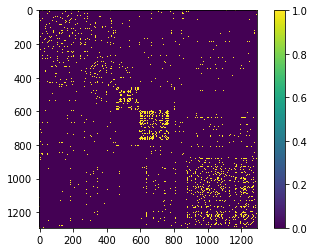

In [197]:
plt.imshow(adjacency_weights)
plt.colorbar()